### 4.2 word cloud

In [28]:
# 파일 열기
import pandas as pd
raw_total = pd.read_excel('./data/jeju_crawling_raw.xlsx')
raw_total.head()

,Unnamed: 0,content,date,like,place,tags
0,0,(광고)지만 찐로컬맛집!!제주도민들의 흑돼지픽🎯'한라축산정육식당'🙏착한가격에 신선함...,2020-10-06,0,NaN,"['#제주흑돼지맛집', '#제주도흑돼지맛집', '#제주시맛집', '#제주공항근처맛집..."
1,1,산도롱1오늘 뭐먹지 고민이신분산도롱맨도롱으로 🍜모두모두 모이세요!100% 도가니 육...,2020-10-07,0,NaN,"['#제주도맛집', '#제주맛집', '#제주도고기국수', '#성산맛집', '#광치기..."
2,4,"광고★성산일출봉이 다보여!성산일출봉도 보이고성산일출봉 파도소리도 드리고2인49,00...",2020-10-06,"1,174",NaN,"['#제주맛집', '#제주도맛집', '#성산맛집', '#서귀포맛집', '#성산일출봉..."
3,5,제주 유일무이 고기국수 맛집🍜100%도가니 육수를 우려 깊은맛이 일품!!호로록 한입...,2020-10-05,"1,256",NaN,"['#제주도맛집', '#제주맛집', '#제주도고기국수', '#성산일출봉맛집', '#..."
4,6,"제주도맛집 검색하다 찾은 대박맛집!.제주도 ""오전 열한시"".다른분께서 리뷰하신거 보...",2020-10-07,0,NaN,"['#광고입니다', '#서귀포맛집', '#중문맛집', '#제주도맛집', '#제주맛집..."


In [29]:
raw_total['tags'][:3]

0    ['#제주흑돼지맛집', '#제주도흑돼지맛집', '#제주시맛집', '#제주공항근처맛집...
1    ['#제주도맛집', '#제주맛집', '#제주도고기국수', '#성산맛집', '#광치기...
2    ['#제주맛집', '#제주도맛집', '#성산맛집', '#서귀포맛집', '#성산일출봉...
Name: tags, dtype: object

In [30]:
# 해시태그 통합 저장
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")  # [ ] 없애고 콤마(,) 기준으로 해시태그 나누기
    for tag in tags_list:
        tags_total.append(tag)

> 해시태그 출현 빈도 집계

In [31]:
# 빈도수 집계(Counter)
from collections import Counter
tag_counts = Counter(tags_total)

In [32]:
# 가장 많이 사용된 해시태그 확인
tag_counts.most_common(100)

[('', 350),
 ('#제주맛집', 328),
 ('#제주여행', 321),
 ('#제주도여행', 318),
 ('#제주도', 271),
 ('#제주도맛집', 265),
 ('#제주', 185),
 ('#제주카페', 99),
 ('#서귀포맛집', 95),
 ('#제주도민맛집', 91),
 ('#jeju', 89),
 ('#애월맛집', 87),
 ('#중문맛집', 86),
 ('#제주공항근처맛집', 76),
 ('#일상', 72),
 ('#여행스타그램', 69),
 ('#제주도카페', 64),
 ('#여행', 56),
 ('#제주가볼만한곳', 54),
 ('#제주핫플', 54),
 ('#제주공항맛집', 53),
 ('#제주맛집추천', 52),
 ('#제주도가볼만한곳', 51),
 ('#먹스타그램', 50),
 ('#제주도민', 48),
 ('#제주살이', 47),
 ('#제주혼밥', 47),
 ('#협재맛집', 46),
 ('#jejuisland', 46),
 ('#좋아요', 45),
 ('#제주시맛집', 44),
 ('#제주고기국수맛집', 44),
 ('#소통', 44),
 ('#제주흑돼지맛집', 43),
 ('#맞팔', 43),
 ('#한림맛집', 41),
 ('#daily', 40),
 ('#데일리', 39),
 ('#제주도고기국수맛집', 37),
 ('#제주바다', 37),
 ('#제주중문맛집', 36),
 ('#제주이색맛집', 34),
 ('#제주도고기국수', 33),
 ('#제주도흑돼지맛집', 32),
 ('#travel', 32),
 ('#맛스타그램', 32),
 ('#성산맛집', 31),
 ('#제주멸치국수', 30),
 ('#좋아요반사', 30),
 ('#제주동문시장맛집', 29),
 ('#맛집', 28),
 ('#선팔', 28),
 ('#제주공항근처', 28),
 ('#용담해안도로', 28),
 ('#좋반', 28),
 ('#월정리맛집', 27),
 ('#제주도맛집추천', 27),
 ('#제주참멜', 27),
 ('#제주동문시장', 27)

In [34]:
# 데이터 정제
STOPWORDS = ['', '#맞팔', '#데일리', '#선팔', '#일상', '#좋아요', '#소통', '#daily', '#좋아요반사']

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
    
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(100)

[('#제주맛집', 328),
 ('#제주여행', 321),
 ('#제주도여행', 318),
 ('#제주도', 271),
 ('#제주도맛집', 265),
 ('#제주', 185),
 ('#제주카페', 99),
 ('#서귀포맛집', 95),
 ('#제주도민맛집', 91),
 ('#jeju', 89),
 ('#애월맛집', 87),
 ('#중문맛집', 86),
 ('#제주공항근처맛집', 76),
 ('#여행스타그램', 69),
 ('#제주도카페', 64),
 ('#여행', 56),
 ('#제주가볼만한곳', 54),
 ('#제주핫플', 54),
 ('#제주공항맛집', 53),
 ('#제주맛집추천', 52),
 ('#제주도가볼만한곳', 51),
 ('#먹스타그램', 50),
 ('#제주도민', 48),
 ('#제주살이', 47),
 ('#제주혼밥', 47),
 ('#협재맛집', 46),
 ('#jejuisland', 46),
 ('#제주시맛집', 44),
 ('#제주고기국수맛집', 44),
 ('#제주흑돼지맛집', 43),
 ('#한림맛집', 41),
 ('#제주도고기국수맛집', 37),
 ('#제주바다', 37),
 ('#제주중문맛집', 36),
 ('#제주이색맛집', 34),
 ('#제주도고기국수', 33),
 ('#제주도흑돼지맛집', 32),
 ('#travel', 32),
 ('#맛스타그램', 32),
 ('#성산맛집', 31),
 ('#제주멸치국수', 30),
 ('#제주동문시장맛집', 29),
 ('#맛집', 28),
 ('#제주공항근처', 28),
 ('#용담해안도로', 28),
 ('#좋반', 28),
 ('#월정리맛집', 27),
 ('#제주도맛집추천', 27),
 ('#제주참멜', 27),
 ('#제주동문시장', 27),
 ('#서귀포카페', 26),
 ('#서귀포가볼만한곳', 26),
 ('#제주핫플레이스', 26),
 ('#제주카페투어', 26),
 ('#곽지맛집', 26),
 ('#제주혼밥추천', 26),
 ('#서귀포', 26),
 ('#제주시

> 막대그래프로 해시태그 살펴보기

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ['win32', 'win64']:
    font_name = 'malgun gothic'
elif sys.platform  == 'darwin':
    font_name = 'AppleGothic'
    
rc('font', family = font_name)

In [36]:
# 데이터 준비
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

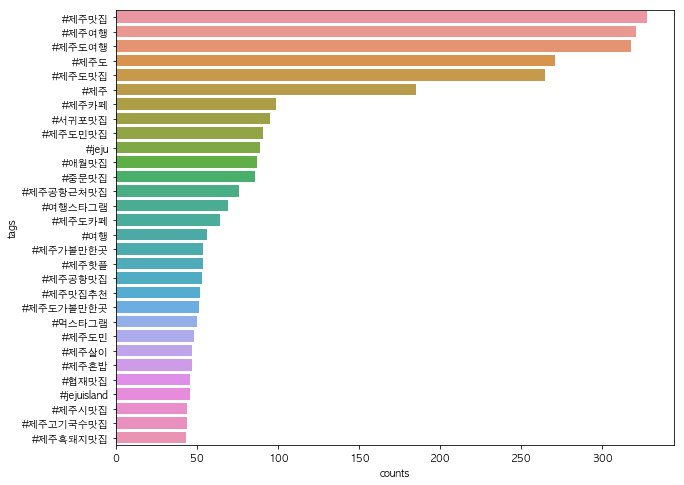

In [37]:
# 막대 차트 그리기
plt.figure(figsize = (10, 8))
sns.barplot(x = 'counts', y = 'tags', data = tag_counts_df)

> 워드 클라우드

In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':
    font_path = 'c:/Windows/Fonts/malgun.ttf'
elif platform.system() == 'Darwin':
    font_path = '/Users/$USER/Library/Fonts/AppleGothic.ttf'

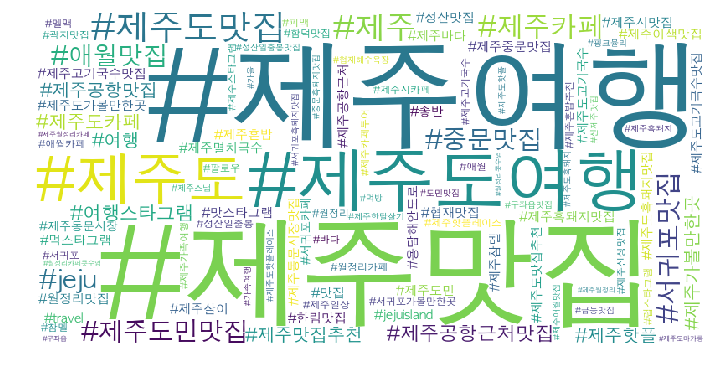

In [51]:
# 워드 클라우드 만들기
wordcloud = WordCloud(font_path = font_path, 
                     background_color = 'white', 
                     max_words = 100, 
                     relative_scaling = 0.3,  # 워드 클라우드 내 글자들의 상대적인 크기(0~1), 0에 가까울수록 빈도수의 순위에, 1에 가까울수록 빈도수에 영향을 받는다.
                     width = 800, 
                     height = 400
                     ).generate_from_frequencies(tag_counts_selected)
plt.figure(figsize = (12, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./data/tag_wordcloud.png')